# We will use classification method KNN and Decision Tree to classify wine type based on their features/characteristics

# KNN Classification

**Importing all the required libraries.**

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
import matplotlib.pyplot as plt
import numpy as np

**Importing Dataset**

We are going to be using the wine toy dataset from SciKit Learn

In [88]:
from sklearn.datasets import load_wine
wine_data = load_wine()
print(wine_data.data.shape)
print(wine_data.target.shape)
print(wine_data.DESCR)

(178, 13)
(178,)
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of 

**Data Processing Function**


In [89]:
def data_processing(wine_data):
    # Split the dataset into training set and temporary set
    X_train, X_temp, y_train, y_temp = train_test_split(wine_data.data, wine_data.target, test_size=0.2, random_state=0)

    # Split the temporary set into validation set and test set
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
    ##############################################
    # X_train, y_train, X_val, y_val, X_test, y_test = data_processing(wine_data)
    

    # Convert all datasets into numpy arrays
    X_train = np.array(X_train)
    X_val = np.array(X_val)
    X_test = np.array(X_test)

    y_train = np.array(y_train)
    y_val = np.array(y_val)
    y_test = np.array(y_test)

    return X_train, y_train, X_val, y_val, X_test, y_test

**Data Processing With Transformations (MinMax and Normalization) Function**  

In [90]:
def data_processing_with_transformation(wine_data, do_minmax_scaling=True, do_normalization=False):
    # Split the dataset into training set and temporary set
    X_train, X_temp, y_train, y_temp = train_test_split(wine_data.data, wine_data.target, test_size=0.2, random_state=0)
    
    # Split the temporary set into validation set and test set
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
    ##############################################
    # Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing_with_transformation(wine_data, do_minmax_scaling=False, do_normalization=True)
    

    # Convert all datasets into numpy arrays
    X_train = np.array(X_train)
    X_val = np.array(X_val)
    X_test = np.array(X_test)

    y_train = np.array(y_train)
    y_val = np.array(y_val)
    y_test = np.array(y_test)

    # Min-Max scaling
    if do_minmax_scaling:
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)

    # Normalization
    if do_normalization:
        normalizer = Normalizer()
        X_train = normalizer.fit_transform(X_train)
        X_val = normalizer.transform(X_val)
        X_test = normalizer.transform(X_test)

    return X_train, y_train, X_val, y_val, X_test, y_test

**Compute L2 Distances Function**

The L2 distance, or Euclidean distance, between two vectors `x` and `x'` is given by:

$$
d(x, x') = \left\| x - x' \right\|_2 = \sqrt{\sum_{i} (x_i - x'_i)^2}
$$

Where:

- $d(x, x')$ is the L2 distance between vectors `x` and `x'`
- $x_i$ is the ith element of vector `x`
- $x'_i$ is the ith element of vector `x'`
- The sum is over all elements of the vectors

The square root of the sum of the squared differences of the corresponding elements of the vectors gives the L2 distance.

In [91]:
def compute_l2_distances(Xtrain, X):
    """
    Compute the distance between each test point in X and each training point
    in Xtrain.
    Inputs:
    - Xtrain: A numpy array of shape (num_train, D) containing training data
    - X: A numpy array of shape (num_test, D) containing test data.
    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Euclidean distance between the ith test point and the jth training
      point.
    """
    num_test = X.shape[0]
    num_train = Xtrain.shape[0]
    dists = np.zeros((num_test, num_train))

    for i in range(num_test):
        for j in range(num_train):
            dists[i, j] = np.sqrt(np.sum((X[i] - Xtrain[j]) ** 2))
    return dists

:**Compute Cosine Distances Function**

The cosine distance between two vectors `x` and `x'` is given by:

$$
d(x, x') = 
\begin{cases} 
1 & \text{if } \|x\|_2 = 0 \text{ or } \|x'\|_2 = 0 \\
1 - \frac{x \cdot x'}{\|x\|_2 \|x'\|_2} & \text{otherwise}
\end{cases}
$$

Where:

- $d(x, x')$ is the cosine distance between vectors `x` and `x'`
- $x \cdot x'$ is the dot product of vectors `x` and `x'`
- $\|x\|_2$ and $\|x'\|_2$ are the L2 norms (or magnitudes) of the vectors `x` and `x'`
- The condition checks if either norm is zero. If so, it returns 1, otherwise it calculates the cosine distance.


In [92]:
def compute_cosine_distances(Xtrain, X):
    """
    Compute the distance between each test point in X and each training point
    in Xtrain.
    Inputs:
    - Xtrain: A numpy array of shape (num_train, D) containing training data
    - X: A numpy array of shape (num_test, D) containing test data.
    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Cosine distance between the ith test point and the jth training
      point.
    """
    num_test = X.shape[0]
    num_train = Xtrain.shape[0]

    # Compute the L2 norms of each test point and training point
    test_L2Norms = np.linalg.norm(X, ord=2, axis=1, keepdims=True)
    train_L2Norms = np.linalg.norm(Xtrain, ord=2, axis=1)

    # Compute the cross terms between X and Xtrain
    cross_terms = np.dot(X, Xtrain.T)

    # Compute the pairwise distances using the L2 distance formula and check for L2 norms that are zero
    dists = np.where((test_L2Norms == 0) | (train_L2Norms == 0), 1, 1 - cross_terms / (test_L2Norms[:, None] * train_L2Norms))
    return dists

**Complete Predict Labels Function**

In [93]:
def predict_labels(k, ytrain, dists):
    """
    Given a matrix of distances between test points and training points,
    predict a label for each test point.
    Inputs:
    - k: The number of nearest neighbors used for prediction.
    - ytrain: A numpy array of shape (num_train,) where ytrain[i] is the label
      of the ith training point.
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      gives the distance betwen the ith test point and the jth training point.
    Returns:
    - ypred: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].
    """
    num_test = dists.shape[0]
    ypred = np.zeros(num_test)

    for i in range(num_test):
        # Find the k nearest neighbors for the current test point
        k_nearest_indices = np.argsort(dists[i])[:k]
        k_nearest_labels = ytrain[k_nearest_indices]

        # Count the votes for each label for each test point
        label_counts = np.bincount(k_nearest_labels.ravel())

        # Determine the most popular label
        ypred[i] = np.argmax(label_counts)
    return ypred

**Compute Error Rate Function**

In [94]:
def compute_error_rate(y, ypred):
    """
    Compute the error rate of prediction based on the true labels.
    Inputs:
    - y: A numpy array with of shape (num_test,) where y[i] is the true label
      of the ith test point.
    - ypred: A numpy array with of shape (num_test,) where ypred[i] is the
      prediction of the ith test point.
    Returns:
    - err: The error rate of prediction (scalar).
    """
    num_test = y.shape[0]
    num_mistakes = np.sum(np.not_equal(y, ypred))
    err = num_mistakes / num_test
    return err

**Find Best k Function**

In [95]:
def find_best_k(K, ytrain, dists, yval):
    """
    Find best k according to validation error rate.
    Inputs:
    - K: A list of ks.
    - ytrain: A numpy array of shape (num_train,) where ytrain[i] is the label
      of the ith training point.
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the distance between the ith test point and the jth training
      point.
    - yval: A numpy array with of shape (num_val,) where y[i] is the true label
      of the ith validation point.**TODO**: Complete compute_l2_distances( ) function
    Returns:
    - best_k: The k with the lowest error rate.
    - validation_error: A list of error rate of different ks in K.
    - best_err: The lowest error rate we get from all ks in K.
    """
    best_k = None
    best_err = float('inf')
    validation_error = np.zeros(len(K))

    # for i, k in enumerate(K):
    #     ypred = predict_labels(k, ytrain, dists)
    #     err = compute_error_rate(yval, ypred)
    #     validation_error[i] = err
    for i in range(len(K)):
      k = K[i]
      ypred = predict_labels(k, ytrain, dists)
      err = compute_error_rate(yval, ypred)
      validation_error[i] = err
      if err < best_err:
          best_err = err
          best_k = k
    return best_k, validation_error, best_err

### Calculate 4-nearest neighbor error. We use data processing without transformation here.

In [96]:
# data = load_wine()
output_file = 'knn_output.txt'
# Compute distance matrix
Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing(wine_data)

dists = compute_l2_distances(Xtrain, Xval)

# Compute validation accuracy when k=4
k = 4
ypred = predict_labels(k, ytrain, dists)
err = compute_error_rate(yval, ypred)
print("The validation error rate is", err)
print()

The validation error rate is 0.3333333333333333



###  Now we re-calculated using data transformations (1) Normalization and (2) Min-max scaling

In [97]:
#(1) With normalization 
# Compute distance matrix
Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing_with_transformation(wine_data, do_minmax_scaling=False, do_normalization=True)

dists = compute_l2_distances(Xtrain, Xval)

# Compute validation accuracy when k=4
k = 4
ypred = predict_labels(k, ytrain, dists)
err = compute_error_rate(yval, ypred)
print("The validation error rate is", err, "when using normalization")
print()

#(2) With min-max scaling
# Compute distance matrix
Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing_with_transformation(wine_data, do_minmax_scaling=True, do_normalization=False)

dists = compute_l2_distances(Xtrain, Xval)

# Compute validation accuracy when k=4
k = 4
ypred = predict_labels(k, ytrain, dists)
err = compute_error_rate(yval, ypred)
print("The validation error rate is", err, "when using minmax_scaling")
print()



The validation error rate is 0.2222222222222222 when using normalization

The validation error rate is 0.05555555555555555 when using minmax_scaling



### Now, instead of L2 distance, we will use Cosine distance for our 4 nearest neighbor classifier. 

In [98]:
# Compute distance matrix using Cosine distance
Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing(wine_data)
dists = compute_cosine_distances(Xtrain, Xval)

# Compute validation accuracy when k=4
k = 4
ypred = predict_labels(k, ytrain, dists)
err = compute_error_rate(yval, ypred)
print("The validation error rate is", err, " using cosine distance")
print()

#Transformation do no change the relative angle between data points
# #(1) With normalization 
# # Compute distance matrix
# Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing_with_transformation(data, do_minmax_scaling=False, do_normalization=True)

# dists = compute_cosine_distances(Xtrain, Xval)

# # Compute validation accuracy when k=4
# k = 4
# ypred = predict_labels(k, ytrain, dists)
# err = compute_error_rate(yval, ypred)
# print("The validation error rate is", err, "when using normalization and using cosine distance")
# print()

# #(2) With min-max scaling
# # Compute distance matrix
# Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing_with_transformation(data, do_minmax_scaling=True, do_normalization=False)

# dists = compute_cosine_distances(Xtrain, Xval)

# # Compute validation accuracy when k=4
# k = 4
# ypred = predict_labels(k, ytrain, dists)
# err = compute_error_rate(yval, ypred)
# print("The validation error rate is", err, "when using minmax_scaling and using cosine distance")
# print()

The validation error rate is 0.5  using cosine distance



### Hyper-parameter tuning: we tune the number of nearest neighbors k that can vote on the validation set

In [99]:
# Compute distance matrix
Xtrain, ytrain, Xval, yval, Xtest, ytest = data_processing(wine_data)

#======performance of different k in training set=====
#use only odd number k to make sure there are no ties
K = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,21,23,25,27,29,31,33,35,37]

dists = compute_l2_distances(Xtrain, Xtrain)
best_k, training_error, best_err = find_best_k(K, ytrain, dists, ytrain)

#==========select best k using validation set==============
dists = compute_l2_distances(Xtrain, Xval)
best_k, validation_error, best_err = find_best_k(K, ytrain, dists, yval)

#===============test the performance with the best k=============
dists = compute_l2_distances(Xtrain, Xtest)
best_k, test_error, best_err = find_best_k(K, ytrain, dists, ytest)

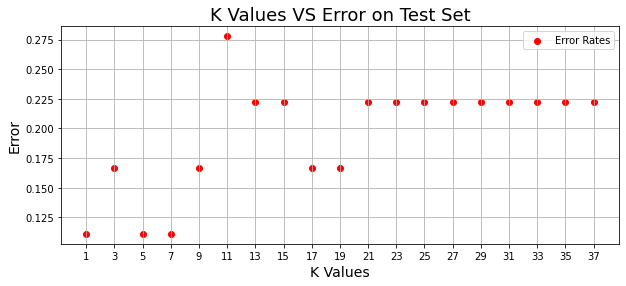

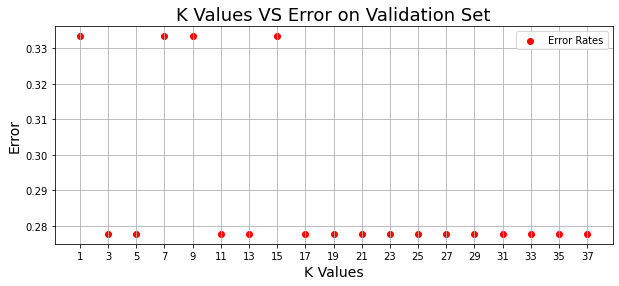

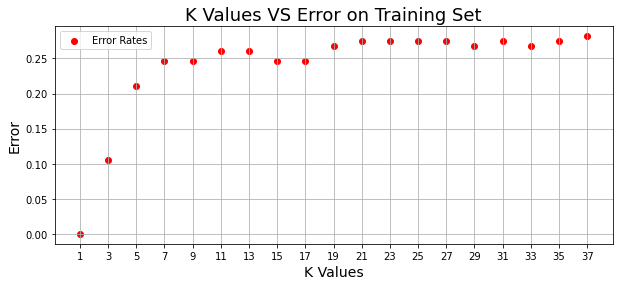

In [100]:
#====================Plot performance===================
plt.figure(figsize=(10,4))
plt.scatter(K, test_error, color='red', label = 'Error Rates')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('K Values', fontsize = 14)
plt.title('K Values VS Error on Test Set', fontsize = 18)
plt.xticks(K)
plt.legend()
plt.grid()
plt.savefig("Error_Rate_On_Test_Set.png")
plt.figure(figsize=(10,4))
plt.scatter(K, validation_error, color='red', label = 'Error Rates')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('K Values', fontsize = 14)
plt.title('K Values VS Error on Validation Set', fontsize = 18)
plt.xticks(K)
plt.legend()
plt.grid()
plt.savefig("Error_Rate_On_Validation_Set.png")
plt.figure(figsize=(10,4))
plt.scatter(K, training_error, color='red', label = 'Error Rates')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('K Values', fontsize = 14)
plt.title('K Values VS Error on Training Set', fontsize = 18)
plt.xticks(K)
plt.legend()
plt.grid()
plt.savefig("Error_Rate_On_Training_Set.png")

In [101]:
dists = compute_l2_distances(Xtrain, Xval)
best_k, validation_error, best_err = find_best_k(K, ytrain, dists, yval)
dists = compute_l2_distances(Xtrain, Xtest)
ypred = predict_labels(best_k, ytrain, dists)
test_err = compute_error_rate(ytest, ypred)
print("We use the best k =",best_k, "with the best validation error rate", best_err)
print("Using the best k, the final test error rate is", test_err)

f=open(output_file, 'w')
for i in range(len(K)):
    f.write('%d %.3f' % (K[i], validation_error[i])+'\n')
f.write('%s %.3f' % ('test', test_err))
f.close()

We use the best k = 3 with the best validation error rate 0.2777777777777778
Using the best k, the final test error rate is 0.16666666666666666


**Analysis & Conclusions**: 
1. Training error becomes approximately constant as we consider more votes. This is to be expected since when you increase the value of k, you are considering more neighbors for each prediction. As k becomes larger, the decision boundary becomes smoother, and the model tends to be less sensitive to individual data points in the training set. This smoothing effect leads to a more generalized model that might not perfectly fit the training data but performs better on new, unseen data. In extreme cases, when k is equal to the total number of training samples (k = n, where n is the number of training samples), the training error will be minimized and might be equal to zero if the decision boundaries capture all the training data points. However, using such a large k could lead to over-smoothing and poor performance on test data, as the model may lose the ability to capture local patterns and relationships within the data.

2. Validation error oscillates between min and max values and then is constant at min values at large k. We choose k which minimizes the validation error. Here we have multiple k values that minimize the validation error (k=3,5,11,13,17 and beyond. We may ask what is the trade off of using a smaller k over a larger k if they give the same validation error. 

Tradeoffs of using smaller k over larger k

Simplicity: A smaller value of k leads to a simpler model, which is easier to interpret and less prone to overfitting. Simplicity can also improve the model's generalization to new, unseen data.

Computational Efficiency: Smaller k values generally require less computational resources since the algorithm needs to consider fewer neighbors during prediction. This can be crucial in scenarios with large datasets or real-time applications.

Robustness: Smaller k values tend to be more robust to noisy data because they rely on a smaller number of neighbors for predictions. Larger k values can be influenced by more distant neighbors, which might introduce noise in the predictions.

However, it's essential to consider the trade-off between bias and variance. Smaller k values might lead to high variance, meaning the model can be sensitive to the specific training data and can vary significantly with different training sets. On the other hand, larger k values can lead to high bias, resulting in a model that is too simplistic and underfits the data.

3. Test error: this is just for observation. We should never hypertune parameters on the test set as it will lead to overfitting on newer data.

4. We chose k=3, even though it gave the same validation error as larger values of k, due to leading to a simpler more robust model

# Decision Tree Classification

**Importing all the required libraries.**

In [102]:
# Libraries for data analysis
import numpy as np # For large multi-dimensional array and matrix processing
import pandas as pd # For data extraction and preparation

#The sklearn.tree module includes decision tree-based models for classification and regression.
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Libraries for displaying results and analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

**Hyperparameter tuning decision tree function**

In [103]:
def tune_decision_tree(X_train, y_train, param_grid, cv=5):
    """
    Perform hyperparameter tuning for a decision tree classifier using GridSearchCV.

    Parameters:
        X_train (array-like): Training data features.
        y_train (array-like): Training data labels.
        param_grid (dict): Dictionary containing hyperparameters and their possible values.
        cv (int, optional): Number of cross-validation folds. Default is 5.

    Returns:
        best_dt_model (DecisionTreeClassifier): The best decision tree model fitted on the training data.
        best_params (dict): A dictionary containing the best hyperparameters found by GridSearchCV.
        best_accuracy (float): The accuracy achieved by the best model on the validation data.
    """
    # Create a decision tree classifier
    dt_classifier = DecisionTreeClassifier()

    # Perform grid search using cross-validation
    grid_search = GridSearchCV(dt_classifier, param_grid, cv=cv)
    grid_search.fit(X_train, y_train)

    # Get the best decision tree model from the grid search
    best_dt_model = grid_search.best_estimator_

    # Get the best hyperparameters and corresponding accuracy
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    # Print the best hyperparameters and accuracy
    print("Best Hyperparameters:", best_params)
    print("Best Accuracy:", best_accuracy)

    return best_dt_model, best_params, best_accuracy



**Split the Dataset**

In [104]:
# X_train, y_train, X_val, y_val, X_test, y_test = data_processing(wine_data)

# print("Size of training data= ", X_train.shape[0]," Samples")
# print("Size of training data= ", X_val.shape[0]," Samples")
# print("Size of testing data= ", X_test.shape[0]," Samples")

# Assuming X_train and X_val are numpy arrays
Xtrain = np.concatenate((Xtrain, Xval), axis=0)

# Assuming y_train and y_val are numpy arrays
ytrain = np.concatenate((ytrain, yval), axis=0)

# Get a random permutation of indices for the combined data
indices = np.random.permutation(len(Xtrain))

# Use the indices to shuffle the combined data
Xtrain = Xtrain[indices]
ytrain = ytrain[indices]


**Fit model to training data**

In [105]:
# Define the hyperparameter grid with even more values
param_grid = {
    'max_depth': [None, 3, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 3, 5, 10, 20],
    'max_features': [None, 5, 10, 13, 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy']
}

# Call the tune_decision_tree function
decision_tree, best_params, best_accuracy = tune_decision_tree(Xtrain, ytrain, param_grid)

print("Simple Visualization of the tree you created:")
print(tree.export_text(decision_tree, feature_names=wine_data.feature_names))


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'best'}
Best Accuracy: 0.96875
Simple Visualization of the tree you created:
|--- flavanoids <= 1.58
|   |--- color_intensity <= 3.82
|   |   |--- class: 1
|   |--- color_intensity >  3.82
|   |   |--- class: 2
|--- flavanoids >  1.58
|   |--- proline <= 724.50
|   |   |--- alcohol <= 13.17
|   |   |   |--- class: 1
|   |   |--- alcohol >  13.17
|   |   |   |--- class: 1
|   |--- proline >  724.50
|   |   |--- color_intensity <= 3.46
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.46
|   |   |   |--- class: 0



**Testing the model**

In [106]:
ypred = None
ypred = decision_tree.predict(Xtest)

**Visualize the Results**

Accuracy of our model is equal to 94.44 %.


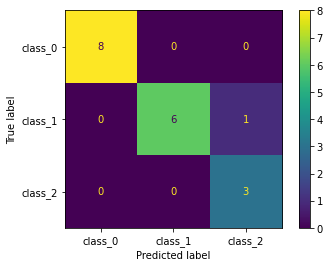

In [107]:
## Make sure to save your accuracy in the variable "acc"
acc = 0
# Calculate the confusion matrix
cmatrix = confusion_matrix(ytest, ypred)

# Plot the confusion matrix
cmplot = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=wine_data.target_names)
cmplot.plot()

# Calculate the accuracy
acc = accuracy_score(ytest, ypred) * 100
# Make sure you plot the confusion matrix, i.e. once this code cell is run, it should output a 3X3 confusion matrix and accuracy #
print('Accuracy of our model is equal to ' + str(round(acc, 2)) + ' %.')

# KNN with cross-validation

K=1, Average Accuracy: 0.712500, Standard Deviation: 0.087052
K=3, Average Accuracy: 0.700000, Standard Deviation: 0.075519
K=5, Average Accuracy: 0.693750, Standard Deviation: 0.105327
K=7, Average Accuracy: 0.687500, Standard Deviation: 0.065551
K=9, Average Accuracy: 0.681250, Standard Deviation: 0.060596
K=11, Average Accuracy: 0.700000, Standard Deviation: 0.057960
K=13, Average Accuracy: 0.718750, Standard Deviation: 0.055902
K=15, Average Accuracy: 0.725000, Standard Deviation: 0.045928
K=17, Average Accuracy: 0.737500, Standard Deviation: 0.050775
K=19, Average Accuracy: 0.712500, Standard Deviation: 0.036443
K=21, Average Accuracy: 0.706250, Standard Deviation: 0.037500
K=23, Average Accuracy: 0.706250, Standard Deviation: 0.050775
K=25, Average Accuracy: 0.706250, Standard Deviation: 0.050775
K=27, Average Accuracy: 0.700000, Standard Deviation: 0.031869
K=29, Average Accuracy: 0.706250, Standard Deviation: 0.037500
K=31, Average Accuracy: 0.687500, Standard Deviation: 0.0395

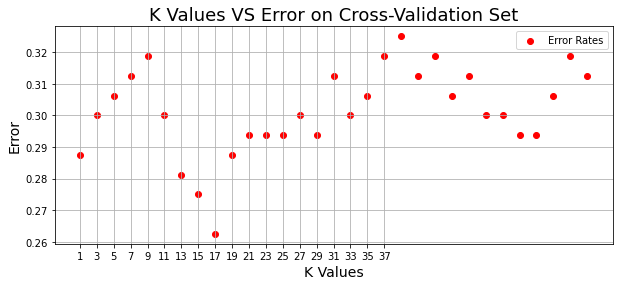

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Define the values of k for KNN
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61]
best_k = None
best_accuracy = 0
# Perform cross-validation for each value of k
mean_errors = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xtrain, ytrain, cv=5)
    avg_score = np.mean(scores)
    mean_errors.append(1-avg_score)
    std_score = np.std(scores)
    print(f"K={k}, Average Accuracy: {avg_score:f}, Standard Deviation: {std_score:f}")
    # Check if the current k gives a better accuracy
    if avg_score > best_accuracy:
        best_k = k
        best_accuracy = avg_score
        
print(f"Best K={best_k}, Best Average Accuracy: {best_accuracy:f}")

plt.figure(figsize=(10,4))
plt.scatter(k_values, mean_errors, color='red', label = 'Error Rates')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('K Values', fontsize = 14)
plt.title('K Values VS Error on Cross-Validation Set', fontsize = 18)
plt.xticks(K)
plt.legend()
plt.grid()
plt.savefig("Error_Rate_On_Validation_Set.png")

In [114]:
# Train the KNN model with the best k value using the entire training dataset
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(Xtrain, ytrain)

# Predict the labels for the test dataset
ypred = knn.predict(Xtest)

# Evaluate the accuracy of the model on the test dataset
accuracy = np.mean(ypred == ytest)
print(f"Accuracy on Test Data: {accuracy:f}")

Accuracy on Test Data: 0.777778
